# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [DELANNOY Rosalie]([link](https://github.com/rosedel05))
- [DOS RAMOS Carl]([link](https://github.com/carldosramos8-prog))

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

In [35]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

In [36]:
def brownian_motion(niter, x, step, rng):

    # Stockage des positions
    W = [np.array(x, dtype=float)]
    intersection = None

    for i in range(1, niter):
        # Tirage d’un incrément gaussien 2D
        G = rng.normal(0, 1, size=2)
        new_point = W[-1] + np.sqrt(step) * G

        # Vérifier si on sort du disque
        if np.linalg.norm(new_point) > 1:

            # Interpolation linéaire
            A = new_point
            B = W[-1]

            # On pose l'équation  ||(1-alpha)B + alpha A||^2 = 1 <=> ||B + alpha(A-B)||^2
            d = A - B
            a = np.dot(d, d)
            b = 2 * np.dot(B, d)
            c = np.dot(B, B) - 1

            # Résolution de l’équation quadratique
            roots = np.roots([a, b, c])

            # Garder la seule racine réelle dans [0,1]
            alpha = roots[np.isreal(roots) & (roots >= 0) & (roots <= 1)][0].real
            intersection = (1 - alpha) * B + alpha * A
            W.append(intersection)
            break

        else:
            W.append(new_point)

    return np.array(W), intersection

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

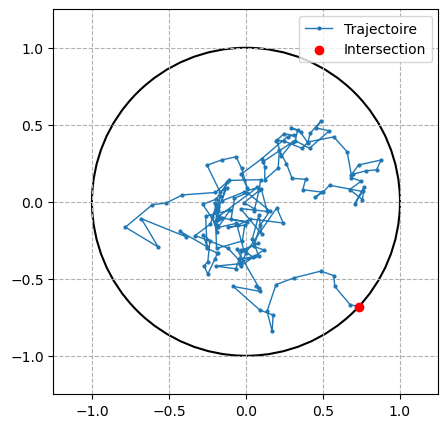

In [37]:
# Définition des paramètres de départ et application de la fonction
start = np.array([0.2, 0.4])
step = 1e-2
niter = 1000
trajectory, intersection = brownian_motion(niter, start, step, rng)

# Création de la figure
fig, ax = plt.subplots(figsize=(5, 5))
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none', linewidth=1.5)
ax.add_artist(circle)

# Tracé de la trajectoire
ax.plot(trajectory[:, 0], trajectory[:, 1], marker='o', markersize=2, linewidth=1, label='Trajectoire')

# Tracé du point d'intersection (s'il existe)
if intersection is not None:
    ax.scatter(intersection[0], intersection[1], color='red', zorder=5, label='Intersection')

ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle='--', zorder=0)
ax.legend(loc='upper right')
plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

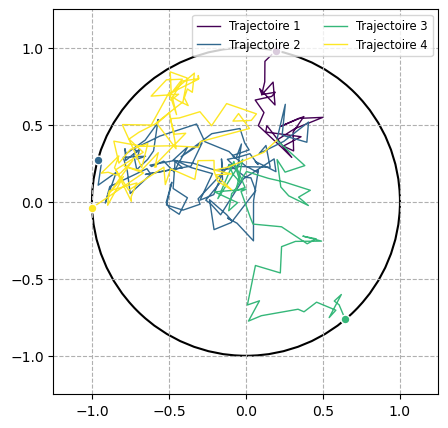

In [38]:
# Création de la figure
fig, ax = plt.subplots(figsize=(5, 5))
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none', linewidth=1.5)
ax.add_artist(circle)

# Tracé des trajectoires et des points d'intersection (s'ils existent)
colors = plt.cm.viridis(np.linspace(0, 1, 4))
for i, color in enumerate(colors, start=1):
    trajectory, intersection = brownian_motion(niter, start, step, rng)
    ax.plot(trajectory[:, 0], trajectory[:, 1], color=color, linewidth=1, label=f'Trajectoire {i}')
    if intersection is not None:
        ax.scatter(intersection[0], intersection[1], color=color, edgecolor='white', s=40, zorder=5)

ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle='--', zorder=0)
ax.legend(loc='upper right', ncol=2, fontsize='small')
plt.show()

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

In [39]:
def brownian_motion_M(niter, x, step, rng):

    # Stockage des positions
    W = [np.array(x, dtype=float)]
    intersection = None
    current = W[0].copy()

    for i in range(1, niter):

        # Tirage d’un incrément gaussien M-dimensionnel
        G = rng.normal(0, 1, size=current.shape)
        new_point = current + np.sqrt(step) * G

        # Vérifier si on sort de la boule unité
        if np.linalg.norm(new_point) > 1:

            # Interpolation linéaire pour trouver le point exact sur la sphère
            A = new_point
            B = current

            # Coefficients de l'équation quadratique ||B + alpha d||^2 = 1
            d = A - B
            a = np.dot(d, d)
            b = 2 * np.dot(B, d)
            c = np.dot(B, B) - 1

            # Résolution de l’équation quadratique
            roots = np.roots([a, b, c])

            # Garder la seule racine réelle dans [0,1]
            valid_roots = roots[np.isreal(roots) & (roots >= 0) & (roots <= 1)].real

            if valid_roots.size > 0:
                alpha = valid_roots[0]
                intersection = (1 - alpha) * B + alpha * A
                W.append(intersection)

            else:
                # Cas limite si aucune racine valide, on prend simplement le nouveau point
                W.append(new_point)
                intersection = new_point

            break

        else:
            W.append(new_point)
            current = new_point  # Mise à jour de la position actuelle

    return np.array(W), intersection

<div style="background-color: #333333; color: #ffffff; padding: 10px; border-radius: 5px;">

**Commentaire**

La généralisation du mouvement brownien à $M$ dimensions se fait de manière analogue au cas 2D : les incréments restent indépendants et identiquement distribués selon une loi gaussienne dans chaque dimension. L’intersection avec la sphère unité se détermine en résolvant l’équation $||W_{n-1} + t(W_n - W_{n-1})||^2 = 1$, ce qui conduit toujours à une équation quadratique en $t$, quel que soit le nombre de dimensions $M$. Cela permet de trouver précisément le point où la trajectoire touche la sphère et de terminer la simulation correctement.

</div>

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

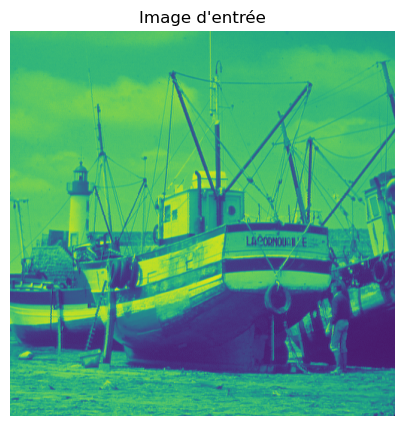

In [40]:
from pathlib import Path

image_path = Path('img/boat.png')
X = plt.imread(image_path).astype(float)
if X.ndim == 3:
    X = X[..., 0] if X.shape[2] == 1 else X.mean(axis=2)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(X)
ax.set_title("Image d'entrée")
ax.axis('off')
plt.show()

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

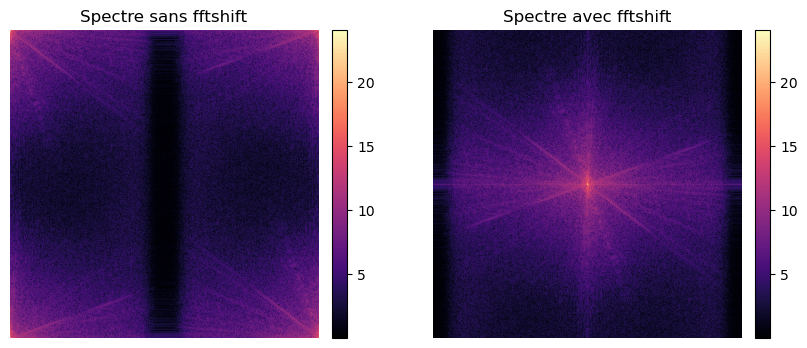

In [41]:
# Calcul de la transformée de Fourier 2D
FX = np.fft.fft2(X)
spectrum = np.abs(FX) ** 2

# Affichage côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Affichage du spectre sans fftshift
im0 = axes[0].imshow(np.log1p(spectrum), cmap='magma')
axes[0].set_title('Spectre sans fftshift')
axes[0].axis('off')
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

# Affichage du spectre avec fftshift
shifted_spectrum = np.fft.fftshift(spectrum)
im1 = axes[1].imshow(np.log1p(shifted_spectrum), cmap='magma')
axes[1].set_title('Spectre avec fftshift')
axes[1].axis('off')
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
plt.show()

<div style="background-color: #333333; color: #ffffff; padding: 10px; border-radius: 5px;">

**Commentaire**

(a) Dans le spectre obtenu sans recentrage, le coefficient correspondant à la fréquence nulle se situe en haut à gauche (indice $(0,0)$), ce qui peut rendre l’interprétation moins intuitive.

(b) L’utilisation de <code>np.fft.fftshift</code> recentre la fréquence nulle au centre de l’image du spectre. Cela place les basses fréquences au centre et les hautes fréquences vers les bords, ce qui facilite la lecture et l’analyse visuelle du spectre.

</div>

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

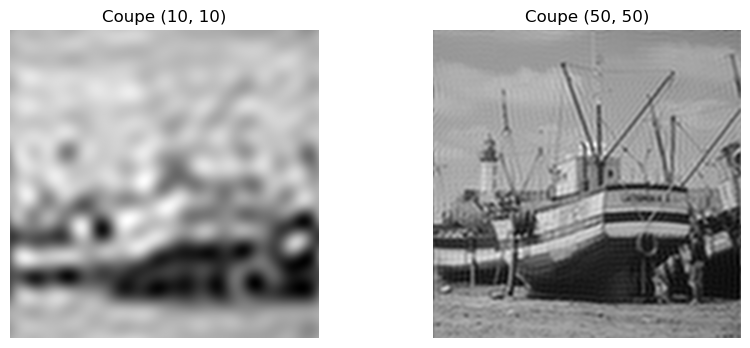

In [42]:
def ideal_lowpass_filter(image, cutoff):

    # Vérification que cutoff contient bien deux valeurs
    if len(cutoff) != 2:
        raise ValueError('cutoff doit contenir deux entiers (fy, fx)')
    fy, fx = map(int, cutoff) # conversion en entiers

    freq = np.fft.fftshift(np.fft.fft2(image)) # Transformée de Fourier 2D et recentrage de la fréquence nulle au centre
    mask = np.zeros_like(freq, dtype=float) # On conserve seulement les fréquences basses

    my, mx = freq.shape # Taille de l'image
    cy, cx = my // 2, mx // 2 # Coordonnées du centre

    # Définition de la fenêtre autour du centre à conserver
    y_min = max(0, cy - fy)
    y_max = min(my, cy + fy + 1)
    x_min = max(0, cx - fx)
    x_max = min(mx, cx + fx + 1)
    mask[y_min:y_max, x_min:x_max] = 1.0

    filtered_freq = freq * mask # Application du masque au spectre

    # Retour dans le domaine spatial
    filtered = np.fft.ifft2(np.fft.ifftshift(filtered_freq))
    return filtered.real

cutoffs = [(10, 10), (50, 50)]
filtered_images = [ideal_lowpass_filter(X, c) for c in cutoffs]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, img, c in zip(axes, filtered_images, cutoffs):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Coupe ({c[0]}, {c[1]})')
    ax.axis('off')
plt.show()

<div style="background-color: #333333; color: #ffffff; padding: 10px; border-radius: 5px;">

**Commentaire**

Le filtre passe-bas idéal conserve uniquement les fréquences situées en dessous des coupures $f_{c,y}$ et $f_{c,x}$. Lorsque ces valeurs augmentent, plus de hautes fréquences sont conservées, ce qui permet à l’image filtrée de retrouver davantage de détails et de contours. En revanche, cela laisse également réapparaître le bruit et les textures fines. À l’inverse, des coupures plus basses produisent un flou plus prononcé et une image plus lisse, où seuls les contours généraux et les basses fréquences sont visibles.

</div>

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

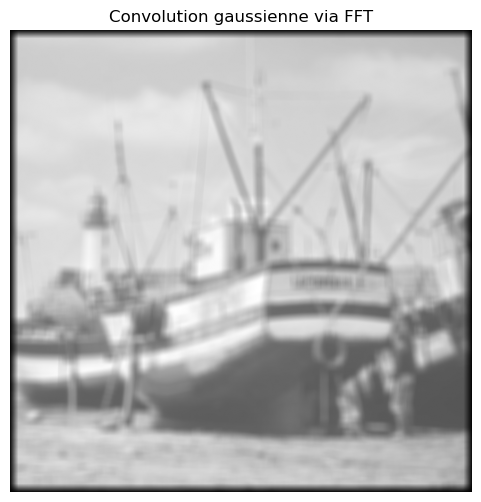

In [43]:
def gaussian_window(length, sigma):

    # Retourne une fenêtre gaussienne normalisée de taille 'length'
    center = (length - 1) / 2.0
    positions = np.arange(length) - center
    window = np.exp(-(positions ** 2) / (2 * sigma ** 2))
    return window

M2 = N2 = 10
sigma_y = sigma_x = 10.0
wy = gaussian_window(M2, sigma_y) # Fenêtre gaussienne verticale
wx = gaussian_window(N2, sigma_x) # Fenêtre gaussienne horizontale
H = np.outer(wy, wx) # Kernel 2D comme produit extérieur
H /= H.sum() # Normalisation pour que la somme vale 1


def linear_convolution_fft(image, kernel):

    # Dimension des images et du kernel
    M1, N1 = image.shape
    M2, N2 = kernel.shape

    # Taille finale de la convolution linéaire
    M = M1 + M2 - 1
    N = N1 + N2 - 1

    # 0-padding de l'image et du kernel
    padded_image = np.zeros((M, N), dtype=float)
    padded_kernel = np.zeros((M, N), dtype=float)
    padded_image[:M1, :N1] = image
    padded_kernel[:M2, :N2] = kernel

    # Convolution via FFT
    conv_freq = np.fft.fft2(padded_image) * np.fft.fft2(padded_kernel)
    return np.fft.ifft2(conv_freq).real

convolved = linear_convolution_fft(X, H) # Application de la convolution

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(convolved, cmap='gray')
ax.set_title('Convolution gaussienne via FFT')
ax.axis('off')
plt.show()

<div style="background-color: #333333; color: #ffffff; padding: 10px; border-radius: 5px;">

**Commentaire**

La convolution avec un noyau gaussien agit comme un filtre passe-bas : elle lisse les variations rapides de l’image et étale les intensités locales, ce qui entraîne un flou général. Les contours deviennent moins nets, les détails fins sont atténués, et les hautes fréquences (bruit ou textures fines) disparaissent. De plus, la taille de l’image résultante est légèrement plus grande que l’image originale en raison du zero-padding utilisé pour réaliser la convolution linéaire via la FFT.

</div>